## **EDA on Home Loan Dataset**

### **Phase 1: Data Collection and Preparation**

In [161]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Task 1.1: Load the Home Loan dataset into a Pandas DataFrame.

In [162]:

# Read the cleaned data CSV file 
df = pd.read_csv("cleaned_home_data.csv")
print("Dataset loaded successfully!")
print("\nFirst 5 rows of the DataFrame:")
df.head()


Dataset loaded successfully!

First 5 rows of the DataFrame:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [163]:
loan_data = df.copy()

In [164]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [165]:
# setting load_id as the index
loan_data.set_index("Loan_ID", inplace = True)

### **Phase 2: Exploratory Data Analysis (EDA)**

### Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

In [166]:
# coverting the Loan AMount Term to object
# loan_data['Loan_Amount_Term'] = loan_data["Loan_Amount_Term"].astype(str)

In [167]:
# mapping loan_status from object to int to check correlation 
# loan_data["Loan_Status"] = loan_data["Loan_Status"].map({"Y":1,"N": 0})

In [168]:
# mapping credit history from int to object to check correlation
# loan_data["Credit_History"] = loan_data["Credit_History"].map({1.0:"good", 0.0:"bad"})

In [169]:
# categorical columns
categorical = [x for x in loan_data.columns if loan_data[x].dtype not in ["int64", "float64"]]
categorical.append("Loan_Amount_Term")
# categorical.append("Credit_History")
categorical

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Amount_Term']

In [170]:
# extracting columns with numerical values
numerical = [x for x in loan_data.columns if x not in categorical]
numerical

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Loan_Status']

In [171]:
# # displaying the categorical columns
# categorical = loan_data.select_dtypes(include =["object"]).columns
# categorical

In [172]:
# # checking numerical columns
# numerical = loan_data.select_dtypes(include=["int64", "float64"]).columns
# numerical

### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.



In [173]:
# print("\nDescriptive Statistics for Numerical Features")
# numerical = loan_data.select_dtypes(include=['float64', 'int64']).columns
# loan_data[numerical].describe().T

In [174]:
# print("\nDescriptive Statistics for Categorical Features")
# categorical_summary = loan_data.select_dtypes(include=["category"]).columns
# loan_data[categorical_summary].describe().T

In [175]:

def univariate_numerical_eda(loan_data, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    
    print(loan_data[column].describe().to_frame())
    print(f"\nSkewness: {loan_data[column].skew():.3f}")
    print(f"Kurtosis: {loan_data[column].kurt():.3f}")
    
    # Plotting the histogram and boxplot
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(loan_data[column], kde=True, bins=30, color='#4C72B0')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=loan_data[column], color='#DD8452')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Skewness Analysis
    column_skew = loan_data[column].skew()
    
    print("\nSkewness Analysis")
    if abs(column_skew) > 1:
        print(f"{column} is highly skewed.")
    elif abs(column_skew) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: Dependents
       Dependents
count  614.000000
mean     0.744300
std      1.009623
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      3.000000

Skewness: 1.016
Kurtosis: -0.347


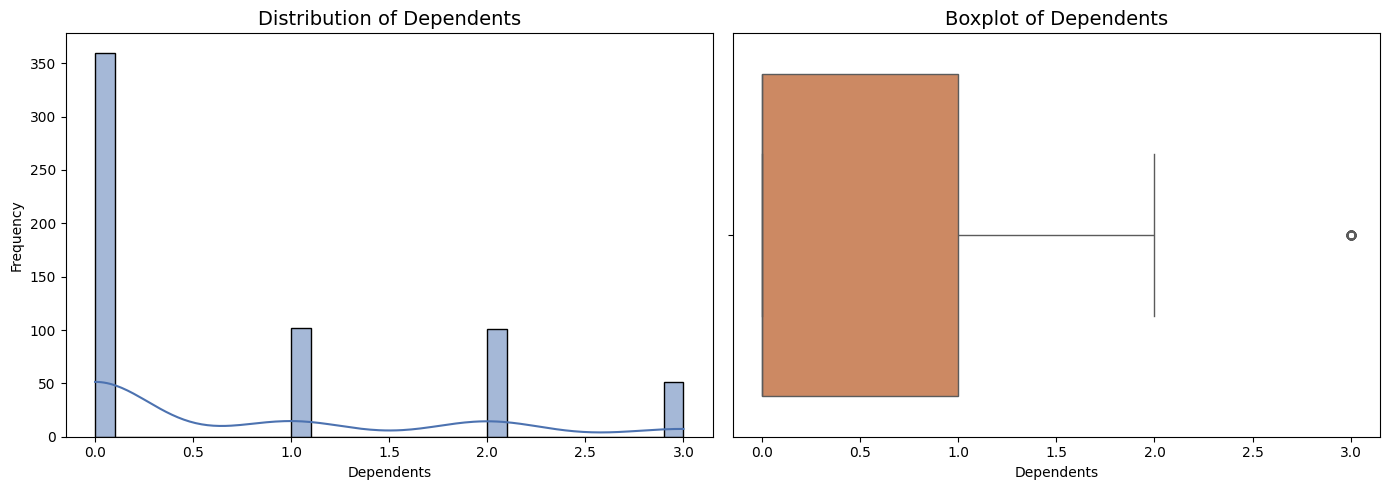


Skewness Analysis
Dependents is highly skewed.
 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.540
Kurtosis: 60.541


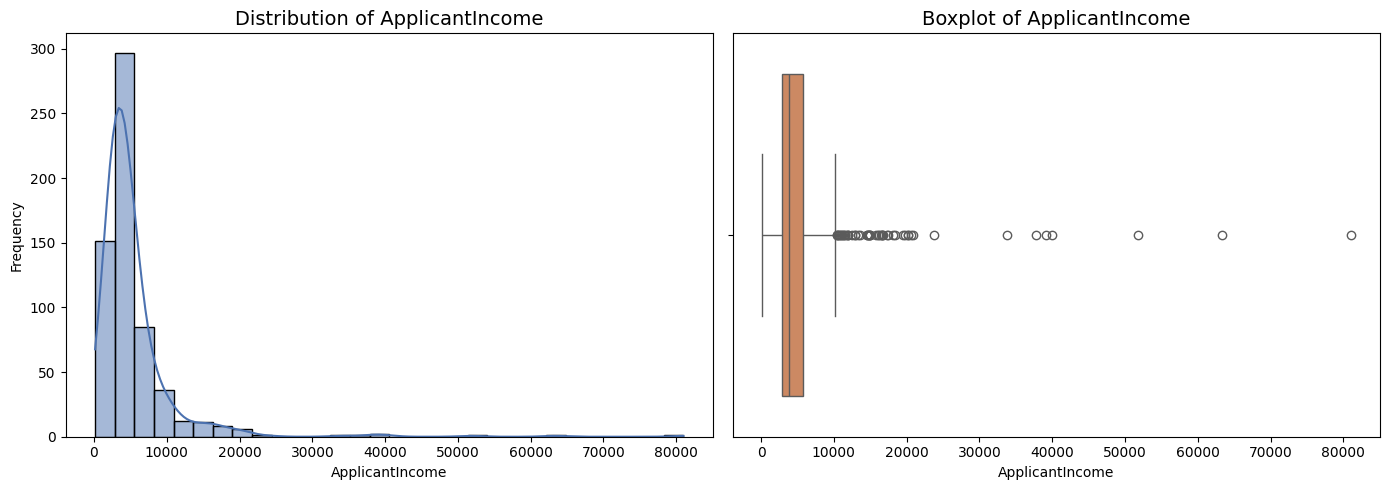


Skewness Analysis
ApplicantIncome is highly skewed.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


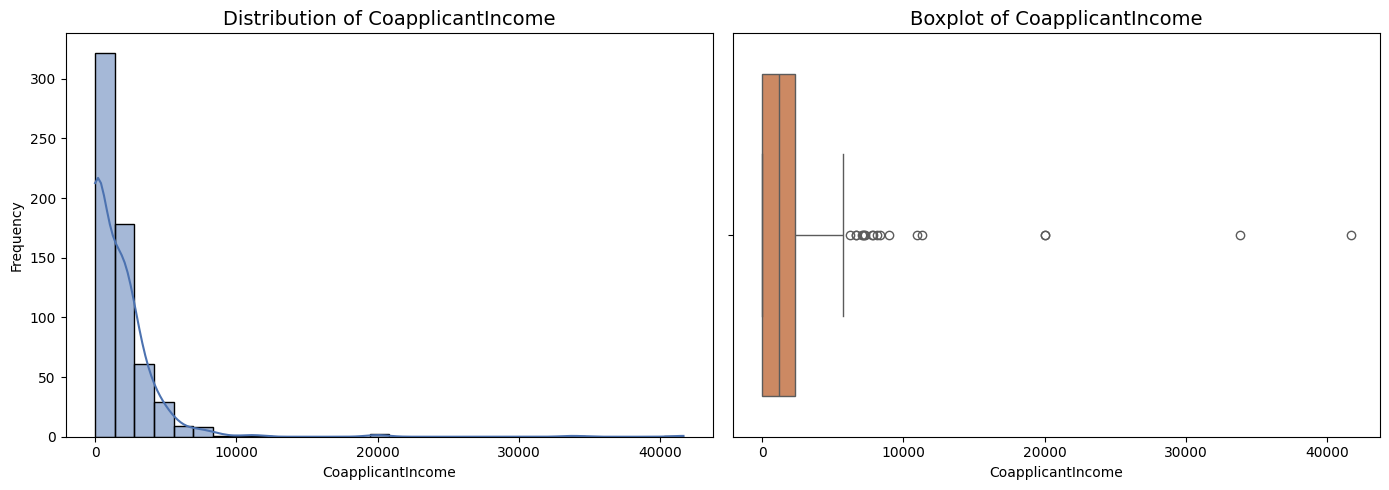


Skewness Analysis
CoapplicantIncome is highly skewed.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000

Skewness: 2.743
Kurtosis: 10.937


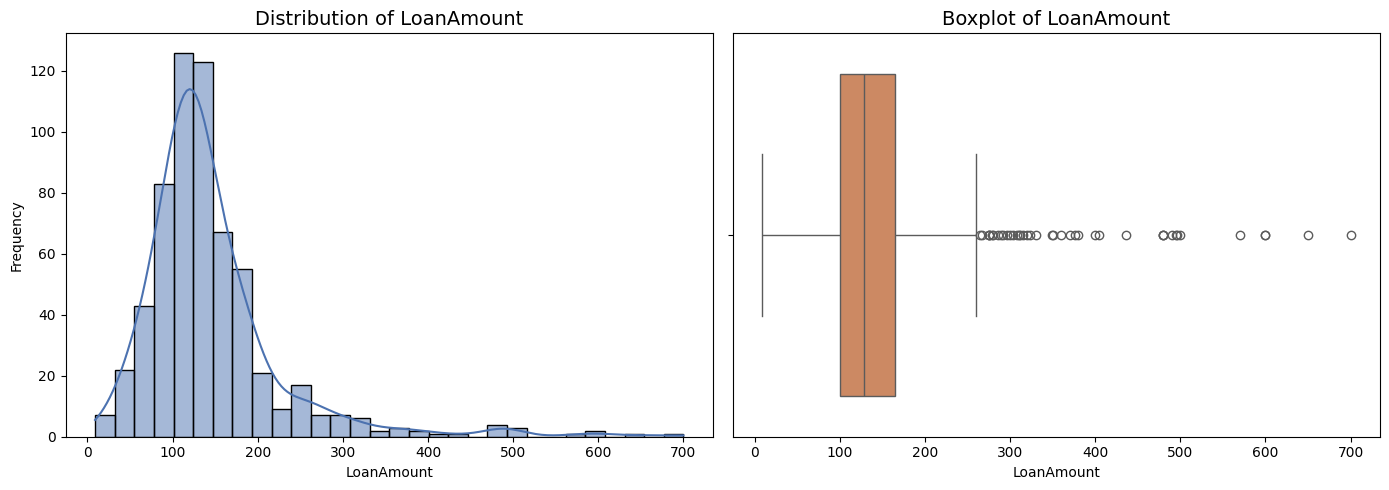


Skewness Analysis
LoanAmount is highly skewed.
 Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.022
Kurtosis: 2.095


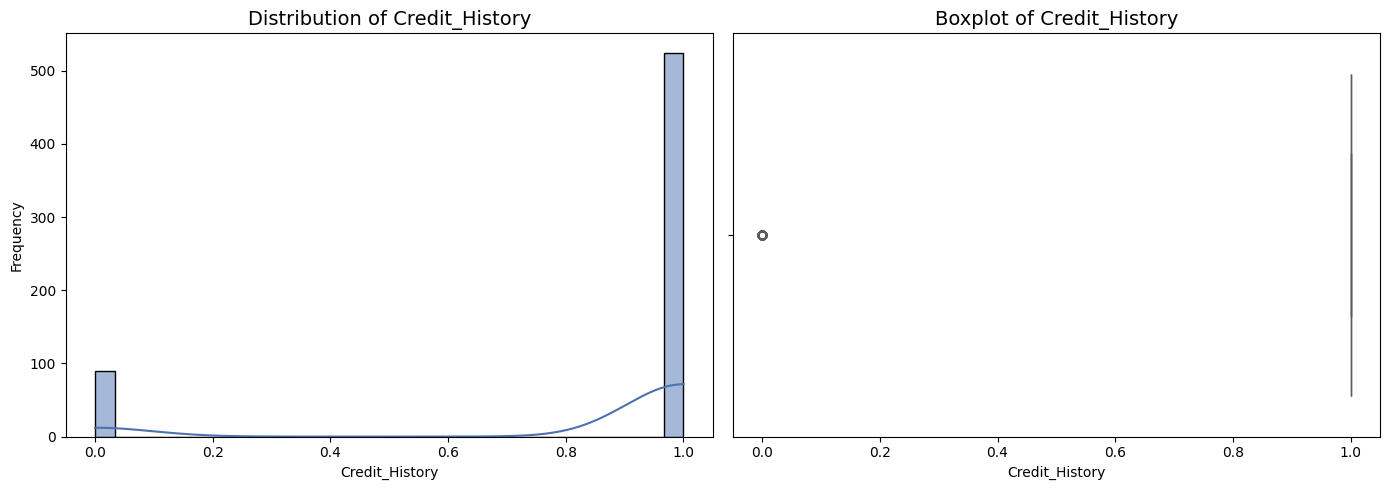


Skewness Analysis
Credit_History is highly skewed.
 Feature: Loan_Status
       Loan_Status
count   614.000000
mean      0.687296
std       0.463973
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

Skewness: -0.810
Kurtosis: -1.348


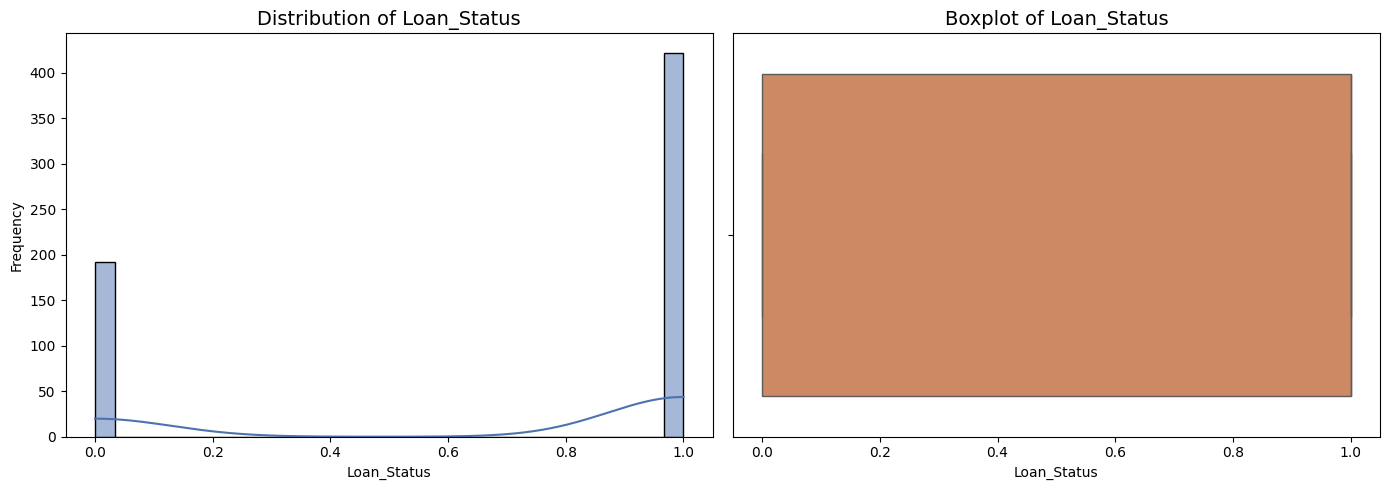


Skewness Analysis
Loan_Status is moderately skewed.


In [176]:
for col in numerical:
    univariate_numerical_eda(loan_data, col)

### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

In [177]:

def univariate_categorical_eda(loan_data, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f" Feature: {column}")
    print("="*50)
    
    # Calculate counts and percentages
    freq = loan_data[column].value_counts()
    prop = loan_data[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    
    plt.figure(figsize=(14, 6))

    # Subplot 1: Bar Chart (Count Plot)
    plt.subplot(1, 2, 1)
    sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')
    plt.title(f'Count Distribution of {column}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(column)

    # Subplot 2: Pie Chart (Percentage Distribution)
    plt.subplot(1, 2, 2)
    plt.pie(prop, labels=freq.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
    plt.title(f'Percentage Distribution of {column}', fontsize=14)
    plt.axis('equal') 
    
    plt.tight_layout()
    plt.show()




 Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29252\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


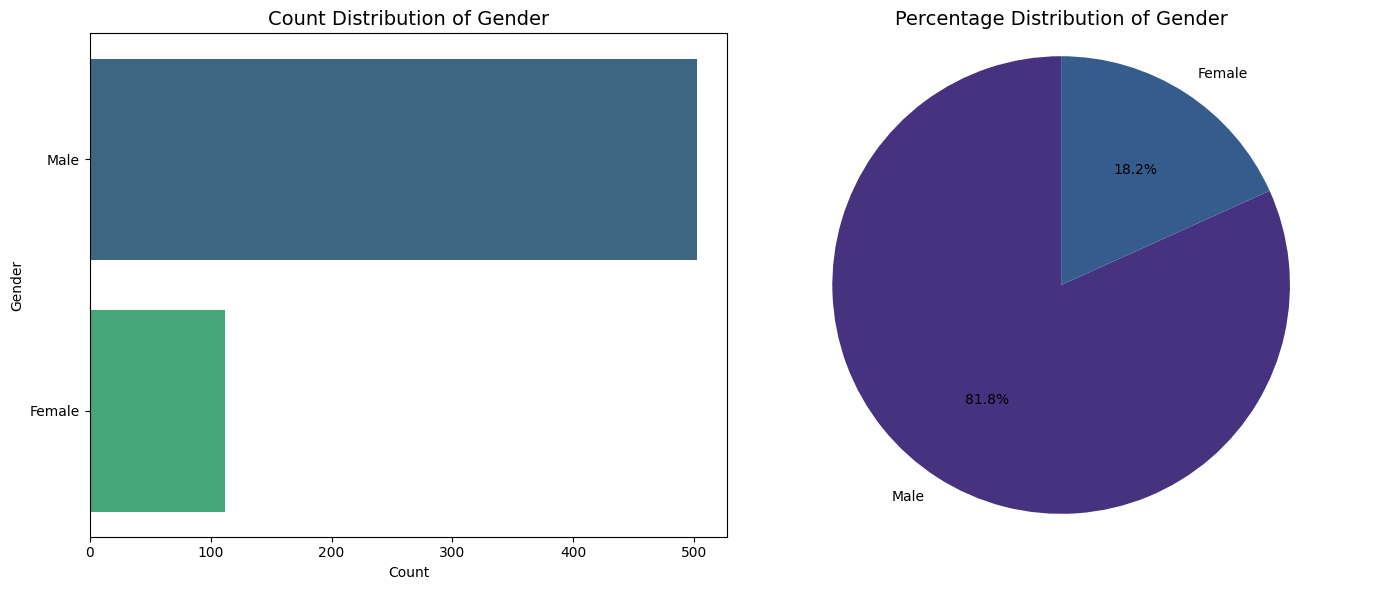

 Feature: Married
         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29252\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


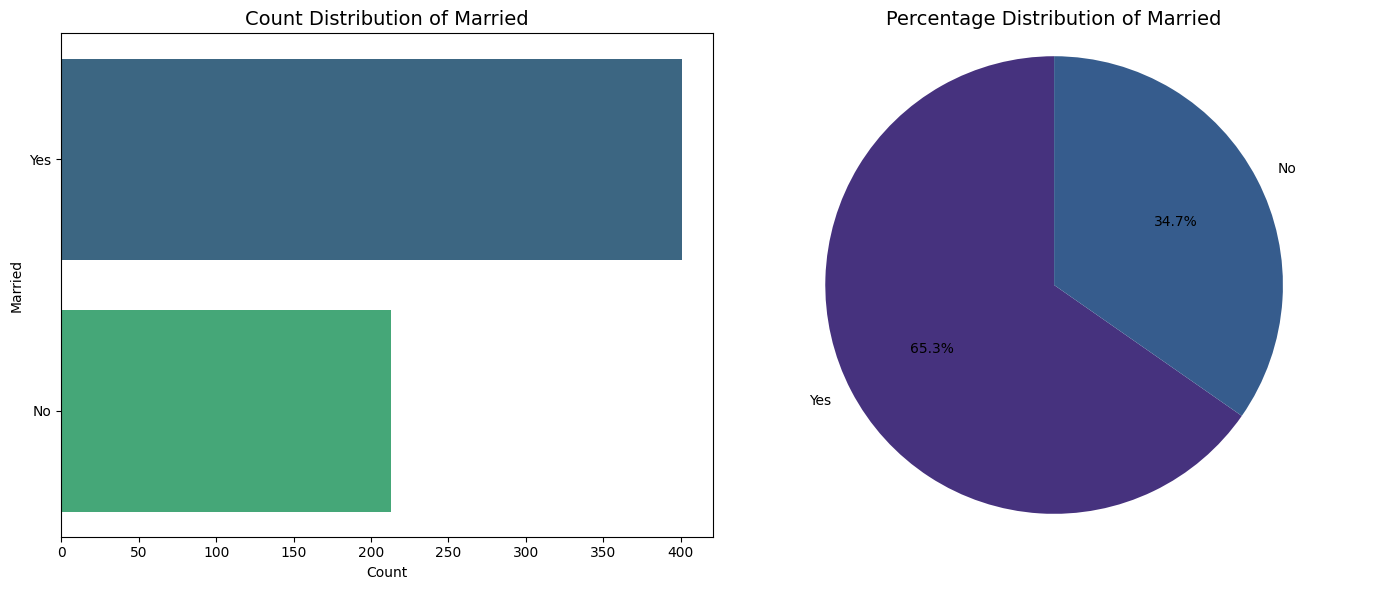

 Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29252\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


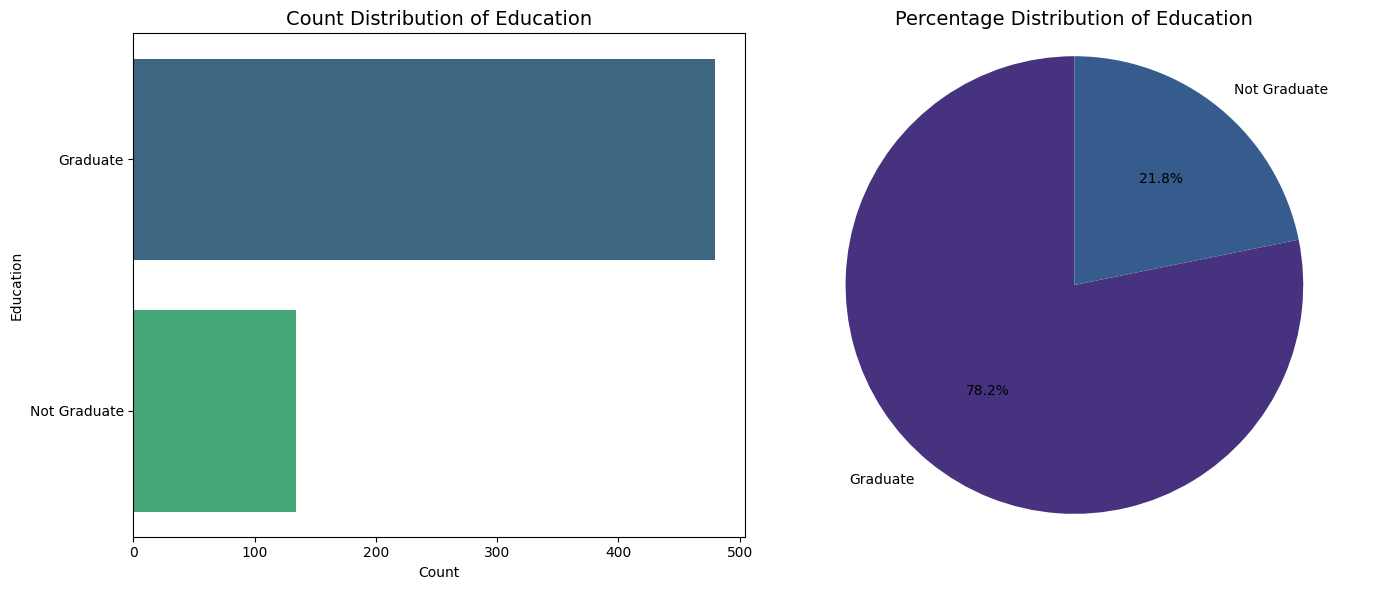

 Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29252\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


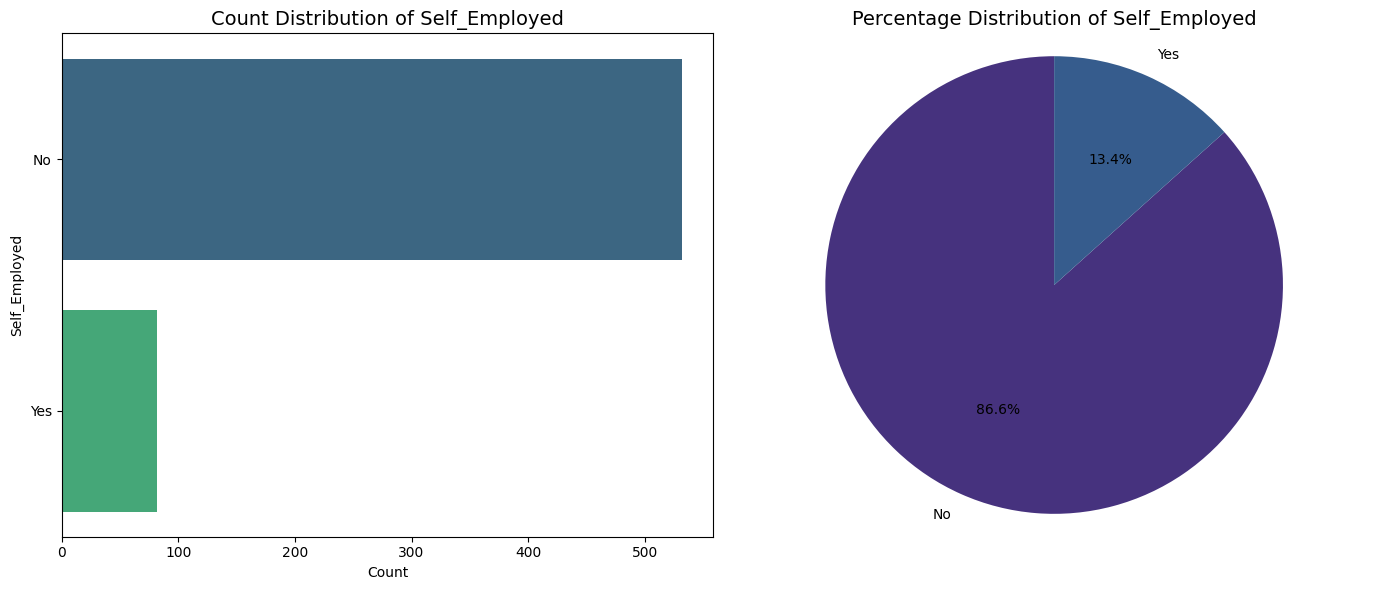

 Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29252\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


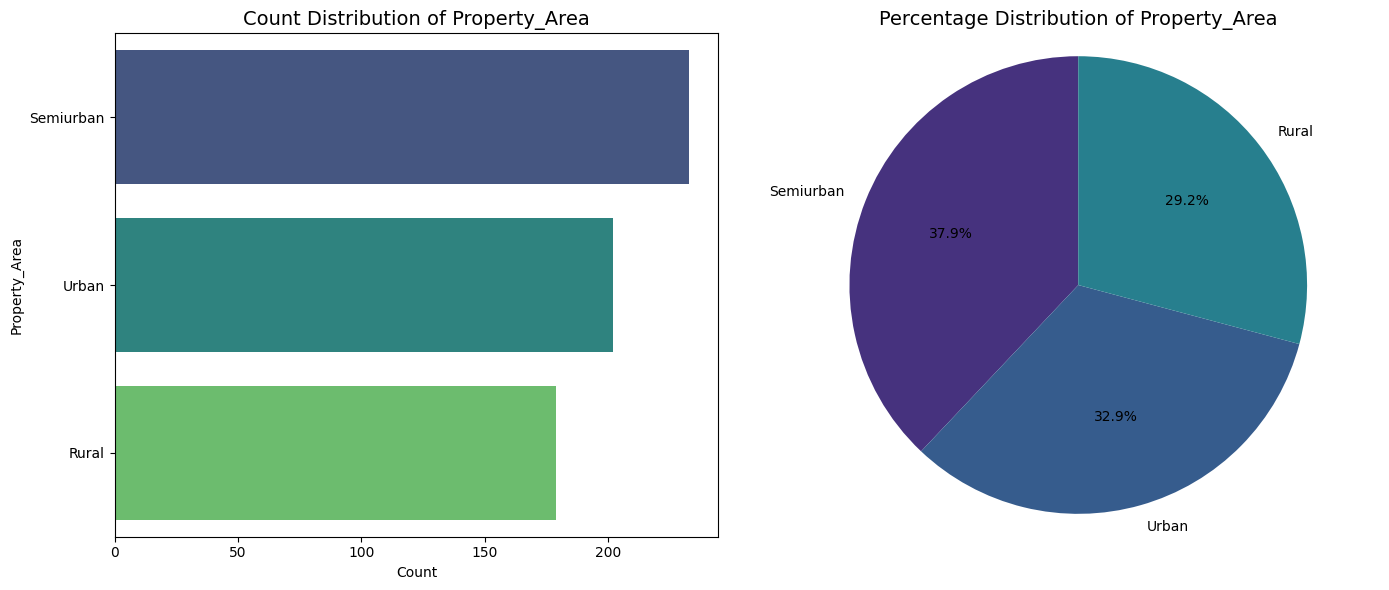

 Feature: Loan_Amount_Term
                  Count  Percentage
Loan_Amount_Term                   
360.0               526       85.67
180.0                44        7.17
480.0                15        2.44
300.0                13        2.12
84.0                  4        0.65
240.0                 4        0.65
120.0                 3        0.49
60.0                  2        0.33
36.0                  2        0.33
12.0                  1        0.16


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29252\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


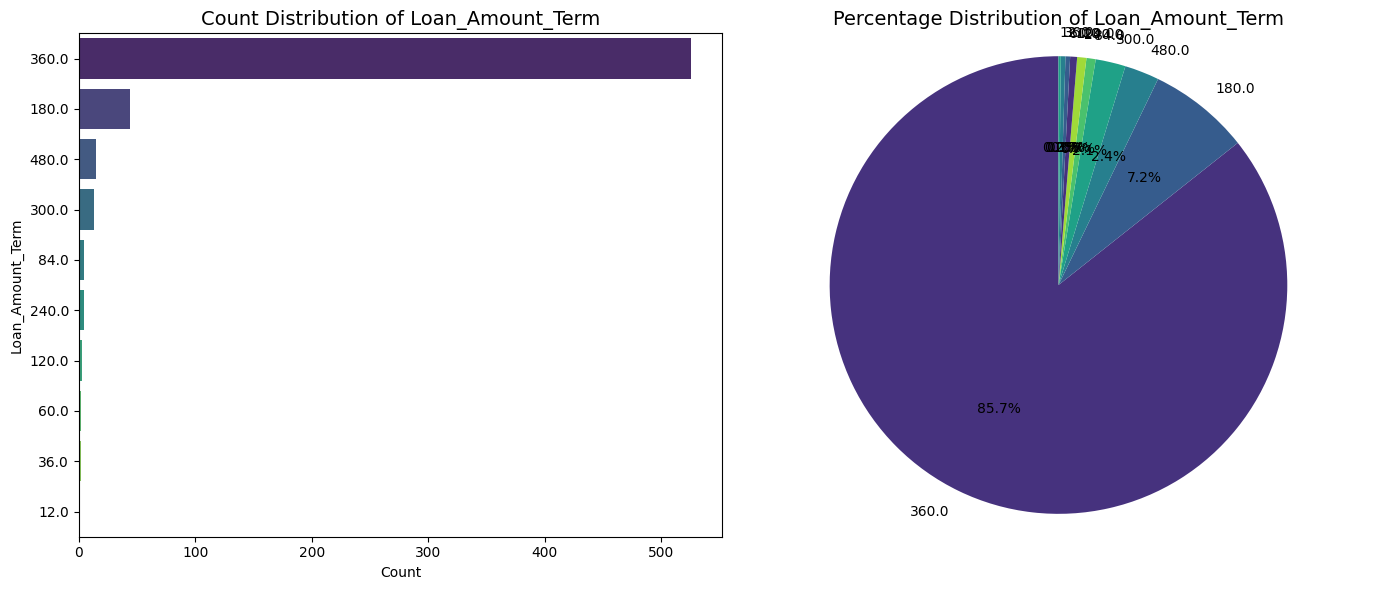

In [178]:
# categorical = ['Gender','Married','Education','Self_Employed','Property_Area','Credit_History','Loan_Status']
for col in categorical:
    univariate_categorical_eda(loan_data, col)

### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

In [179]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1


In [180]:
def correlation_with_target(loan_data, target_col, figsize =(10,3)):
    
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    corrs = loan_data[numerical].corrwith(loan_data[target_col]).drop(target_col)
    corrs_df =corrs.to_frame(name="corr").T
    
    
    plt.figure(figsize=figsize)
    sns.heatmap(corrs_df,annot=True,fmt=".3f",cmap="coolwarm",center = 0,vmin= -1,vmax=1,cbar_kws={"orientation": "vertical", "shrink":0.7})
    plt.xticks(rotation=45, ha="right")
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize = 12)
    plt.tight_layout()
    plt.show()
    
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index) 

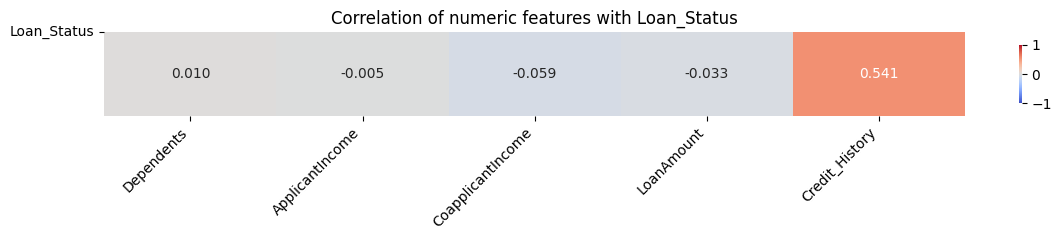

In [181]:
corr_series = correlation_with_target(loan_data, "Loan_Status", figsize=(12, 2.5))

In [182]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(data, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """
    if x_col in data.columns and y_col in data.columns:
        # Calculate correlation coefficient
        corr, p_value = pearsonr(loan_data[x_col], loan_data[y_col])

        # Create plot
        plt.figure(figsize=(8, 5))
        sns.regplot(data=loan_data, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        
        # Title and labels
        plt.title(f"{x_col} vs {y_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
        plt.xlabel(x_col, fontsize=11)
        plt.ylabel(y_col, fontsize=11)
        plt.grid(alpha=0.3)
        plt.show()


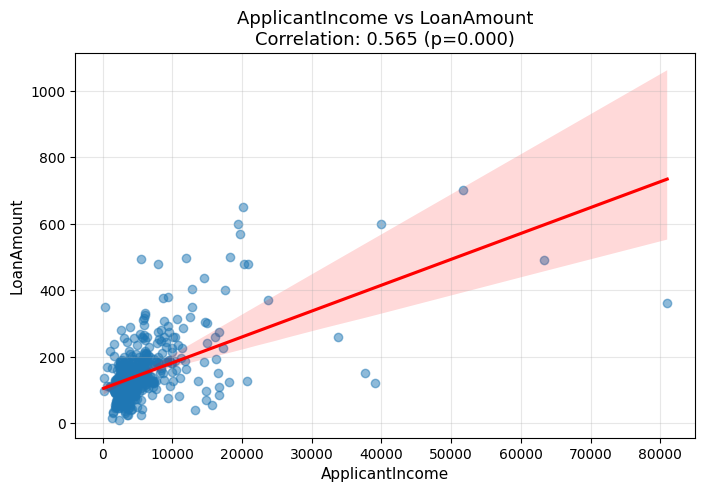

In [183]:
numeric_bivariate_plot(loan_data,  'ApplicantIncome','LoanAmount')

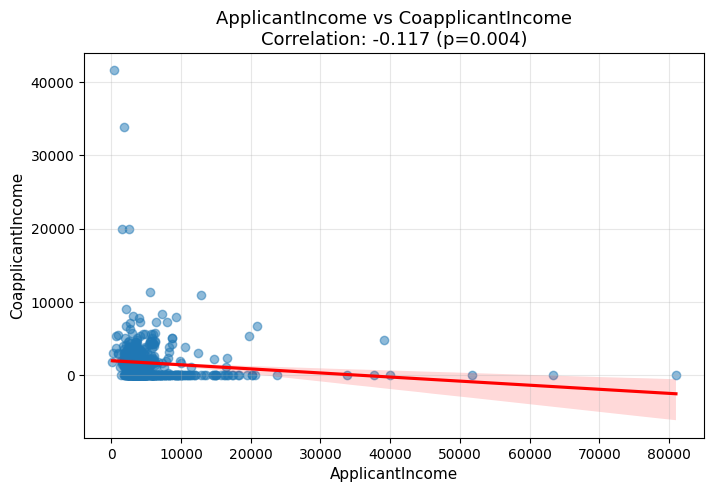

In [184]:
numeric_bivariate_plot(loan_data,  'ApplicantIncome','CoapplicantIncome')


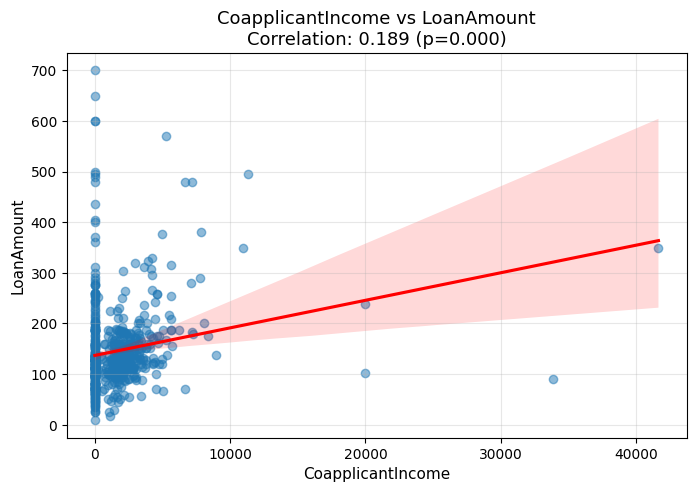

In [185]:
numeric_bivariate_plot(loan_data, 'CoapplicantIncome','LoanAmount')

In [186]:
# cleaned_data

In [187]:
# cleaned_data = loan_data.to_csv("home_loan_cleaned.csv", index=False)